In [1]:
import matplotlib.pyplot as plt
import torch
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from NeuralNet import *

class FakeReact:
    """ Imitation type class implementation of Pygame Reacts.
        Needs 'width' and 'height' for initialization, but auto-adjusts,
        remaining params when one is adjusted and implements
        'property' type setter/getter attributes."""
    def __init__(self, height, width,
                 centerx: int = 0,
                 centery: int = 0,
                 left: int = 0,
                 right: int = 0,
                 top: int = 0,
                 bottom: int = 0):
        self._height = height
        self._width = width
        self._centerx = centerx
        self._centery = centery
        self._left = left
        self._right = right
        self._top = top
        self._bottom = bottom

    def _get_right(self):
        return self._right

    def _set_right(self, value):
        self._right = value
        self._left = self._right - self._width
        self._centerx = self._right - self._width // 2

    def _del_right(self):
        del self._right

    right = property(
        fget=_get_right,
        fset=_set_right,
        fdel=_del_right,
        doc="The right property."
    )

    def _get_left(self):
        return self._left

    def _set_left(self, value):
        self._left = value
        self._right = self._left + self._width
        self._centerx = self._left + self._width // 2

    def _del_left(self):
        del self._left

    left = property(
        fget=_get_left,
        fset=_set_left,
        fdel=_del_left,
        doc="The left property."
    )


    def _get_centerx(self):
        return self._centerx

    def _set_centerx(self, value):
        self._centerx = value
        self._left = self._centerx - self._width // 2
        self._right = self._left + self._width


    def _del_centerx(self):
        del self._centerx

    centerx = property(
        fget=_get_centerx,
        fset=_set_centerx,
        fdel=_del_centerx,
        doc="The centerx property."
    )

    def _get_centery(self):
        return self._centery

    def _set_centery(self, value):
        self._centery = value
        self._top = self._centery - self._height // 2
        self._bottom = self._top + self._height

    def _del_centery(self):
        del self._centery

    centery = property(
        fget=_get_centery,
        fset=_set_centery,
        fdel=_del_centery,
        doc="The centery property."
    )


    def _get_top(self):
        return self._top

    def _set_top(self, value):
        self._top = value
        self._centery = self._top + self._height // 2
        self._bottom = self._top + self._height

    def _del_top(self):
        del self._top

    top = property(
        fget=_get_top,
        fset=_set_top,
        fdel=_del_top,
        doc="The top property."
    )

    def _get_bottom(self):
        return self._bottom

    def _set_bottom(self, value):
        self._bottom = value
        self._centery = self._bottom - self._height // 2
        self._top = self._bottom - self._height

    def _del_bottom(self):
        del self._bottom

    bottom = property(
        fget=_get_bottom,
        fset=_set_bottom,
        fdel=_del_bottom,
        doc="The bottom property."
    )

    @property
    def width(self):
        return self._width

    @property
    def height(self):
        return self._height

    def move(self,x,y):
        self._set_centerx(self._centerx + x)
        self._set_centery(self._centery + y)
        return FakeReact(width=self._width,
                  height=self._height,
                  centerx=self._centerx,
                  centery=self._centery,
                  left=self._left,
                  right=self._right,
                  top=self._top,
                  bottom=self._bottom)


def FakeColliderect(fakerect1: FakeReact,
                    fakerect2: FakeReact) -> bool:
    if fakerect2.left <= fakerect1.left <= fakerect2.right:
        if fakerect2.top <= fakerect1.top <= fakerect2.bottom:
            return True
        elif fakerect1.top <= fakerect2.top <= fakerect1.bottom:
            return True
        return False
    elif fakerect1.left <= fakerect2.left <= fakerect1.right:
        if fakerect2.top <= fakerect1.top <= fakerect2.bottom:
            return True
        elif fakerect1.top <= fakerect2.top <= fakerect1.bottom:
            return True
        return False
    return False

def PlotFakeReacts(fakereacts: list[FakeReact,...]) -> None:
    fig, ax = plt.subplots(1,1,figsize=(3,3))
    ax.set_xlim(0, 10 * fakereacts[0].width)
    ax.set_ylim(- 10 * fakereacts[0].height,0)
    ax.set_aspect("equal")
    squares = [Rectangle(xy=(fake_rect.left, -fake_rect.bottom),
                         width=fake_rect.width,
                         height=fake_rect.height) for fake_rect in fakereacts]
    pc = PatchCollection(squares, facecolor=[((i+1)*50,(i+1)*100,(i+1)*150) for i in range(len(fakereacts))], alpha=0.9,
                         edgecolor='black')
    ax.add_collection(pc)
    plt.show()


In [2]:
height, width = 36, 36
test = FakeReact(height=height,width=width)

In [3]:
test.centery = 4*height//2
test.centerx = 4*height//2
test.right, test.left, test.top, test.bottom, test.centerx, test.centery, test.width, test.height,

(90, 54, 54, 90, 72, 72, 36, 36)

In [4]:
test2 = FakeReact(height=height,width=width)
test2.centery = 3*height//2
test2.centerx = 2*height//2
test2.right, test2.left, test2.top, test2.bottom, test2.centerx, test2.centery, test2.width, test2.height,

(54, 18, 36, 72, 36, 54, 36, 36)

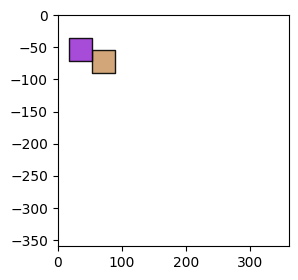

(None, True)

In [5]:
my_reacts = [test, test2]
PlotFakeReacts(my_reacts), FakeColliderect(my_reacts[0],my_reacts[1])

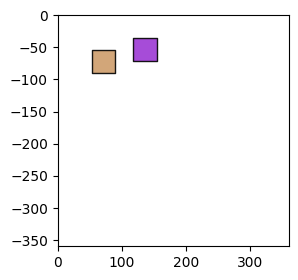

In [6]:
test2 = test2.move(x=100,y=0)
my_reacts = [test, test2]
PlotFakeReacts(my_reacts)

In [8]:
hehe = NeuralNetwork()

In [28]:
for layer_name in hehe.state_dict():
    if "weight" not in layer_name and "bias" not in layer_name:
        continue
    else:
        print(hehe.state_dict()[layer_name])


tensor([[ 0.2236, -0.2129,  0.2783, -0.0564, -0.0557, -0.1051, -0.3037,  0.1256],
        [-0.3183, -0.2194, -0.3289, -0.2271, -0.1226, -0.3334, -0.0317,  0.1685],
        [ 0.0286, -0.1903, -0.0951, -0.2220,  0.1643, -0.0834, -0.0950,  0.0583],
        [-0.2319, -0.3380,  0.2820,  0.3282,  0.2033, -0.0450,  0.0764,  0.0875],
        [ 0.2188, -0.3507,  0.3009,  0.1165, -0.0952, -0.2477,  0.2210,  0.0923],
        [ 0.0796, -0.2436,  0.0705, -0.1945,  0.0742,  0.3462,  0.1909,  0.2289],
        [ 0.2733,  0.1723, -0.1190, -0.1697,  0.2489,  0.0484, -0.2282,  0.2769],
        [-0.3096, -0.2094, -0.0207,  0.1830,  0.3020, -0.2730,  0.1852,  0.2453]])
tensor([-0.3287,  0.2067,  0.3225,  0.2282, -0.1669,  0.0007,  0.2505, -0.0333])
tensor([[ 1.2559e-01,  2.2984e-01, -3.7825e-02, -2.3482e-01, -2.5623e-01,
          2.4306e-01, -2.5163e-02,  2.7425e-01],
        [ 3.5043e-01, -2.7476e-01,  1.2905e-01, -1.0688e-01,  6.5672e-02,
         -2.1636e-01, -2.3448e-02,  9.3499e-02],
        [ 2.2662

In [29]:
lr = 0.01
for layer_name in hehe.state_dict():
    if "weight" not in layer_name and "bias" not in layer_name:
        continue
    hehe.state_dict()[layer_name] += lr*torch.rand(size=hehe.state_dict()[layer_name].shape)

In [30]:
for layer_name in hehe.state_dict():
    if "weight" not in layer_name and "bias" not in layer_name:
        continue
    else:
        print(hehe.state_dict()[layer_name])

tensor([[ 0.2301, -0.2066,  0.2832, -0.0511, -0.0541, -0.1039, -0.2945,  0.1356],
        [-0.3153, -0.2167, -0.3250, -0.2244, -0.1198, -0.3255, -0.0271,  0.1757],
        [ 0.0326, -0.1828, -0.0867, -0.2139,  0.1737, -0.0825, -0.0904,  0.0676],
        [-0.2265, -0.3375,  0.2838,  0.3348,  0.2109, -0.0404,  0.0787,  0.0969],
        [ 0.2269, -0.3504,  0.3102,  0.1219, -0.0871, -0.2395,  0.2273,  0.0969],
        [ 0.0825, -0.2395,  0.0769, -0.1877,  0.0793,  0.3526,  0.1930,  0.2385],
        [ 0.2807,  0.1795, -0.1176, -0.1639,  0.2504,  0.0499, -0.2232,  0.2795],
        [-0.3011, -0.2058, -0.0165,  0.1850,  0.3054, -0.2639,  0.1876,  0.2476]])
tensor([-0.3239,  0.2142,  0.3237,  0.2332, -0.1588,  0.0017,  0.2510, -0.0317])
tensor([[ 0.1293,  0.2383, -0.0337, -0.2308, -0.2517,  0.2476, -0.0205,  0.2819],
        [ 0.3575, -0.2663,  0.1315, -0.1018,  0.0720, -0.2072, -0.0215,  0.0999],
        [ 0.2312,  0.2099, -0.1785, -0.3163, -0.1121,  0.2858, -0.2533, -0.2429],
        [ 0.0751

In [34]:
hehe = [99,-23,9,0,33]
print(np.argsort(np.array(hehe)))
print(np.array(hehe)[np.argsort(np.array(hehe))])

[1 3 2 4 0]
[-23   0   9  33  99]
